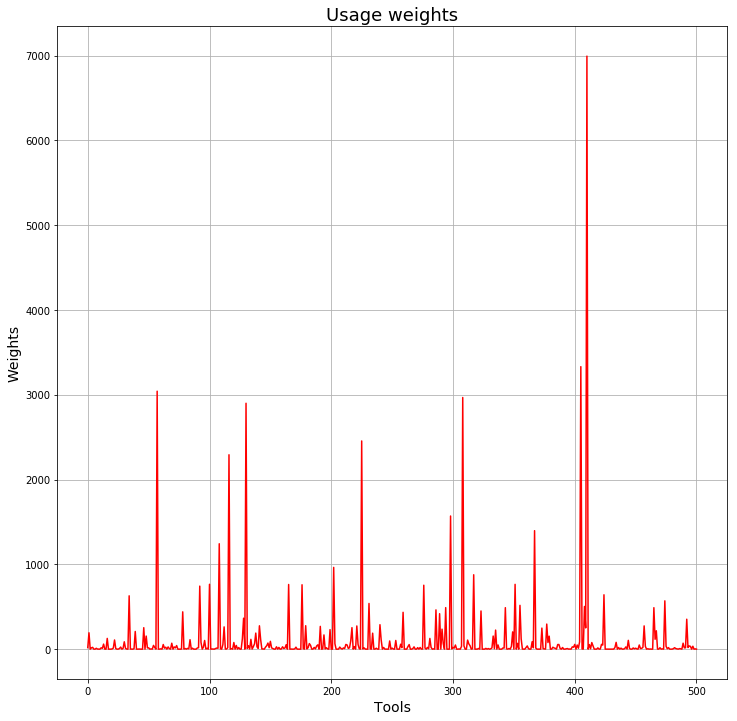

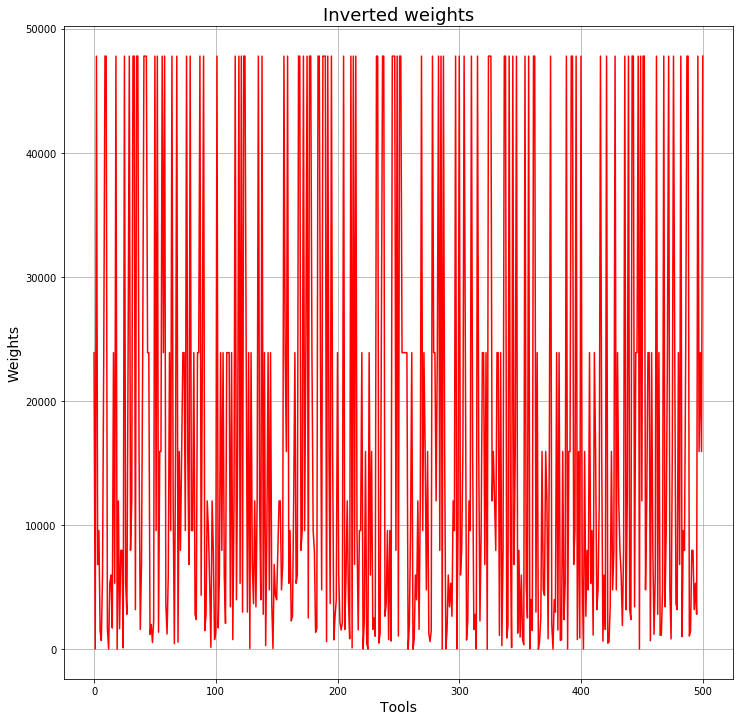

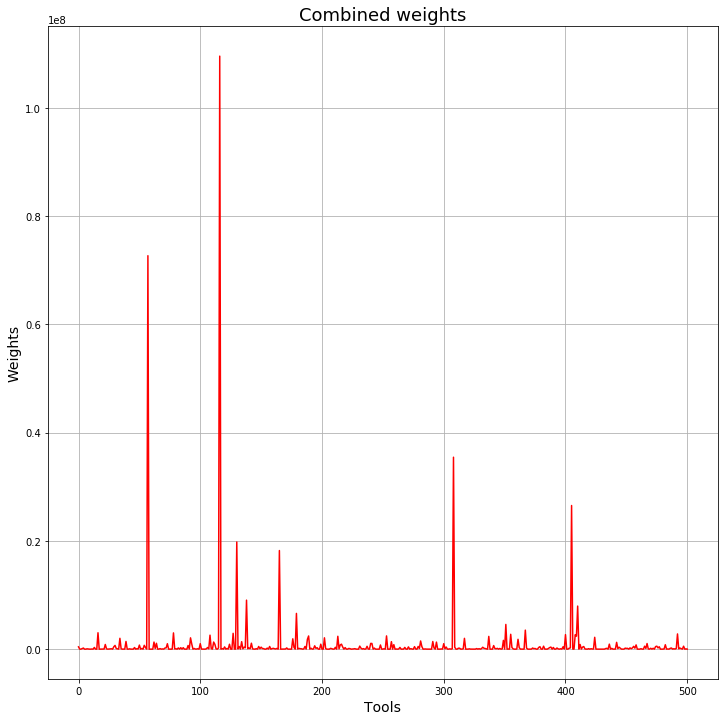

In [34]:
import numpy as np
import json
import warnings

from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

size_title = 18
size_label = 14
n_pred = 2

data_dict = "data/generated_files/data_dict.txt"
inverted_wt = "data/generated_files/inverted_weights.txt"
usage_wt = "data/generated_files/usage_prediction.txt"

def read_file(file_path):
    with open(file_path, 'r') as data_file:
        data = json.loads(data_file.read())
    return data

def plot_hist(x_val1, title):

    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.xlabel('Tools', size=size_label)
    plt.ylabel("Weights", size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()

dictionary = read_file(data_dict)
inverted_weights = read_file(inverted_wt)
usage_weights = read_file(usage_wt)

usage_list = list()
inverted_wt_list = list()
for tool_name, tool_id in dictionary.items():
    try:
        ug = usage_weights[tool_name]
    except Exception:
        ug = 1.0
        continue
    try:
        inv_wt = inverted_weights[str(tool_id)]
    except Exception:
        inv_wt = 1.0
        continue
    usage_list.append(ug)
    inverted_wt_list.append(inv_wt)
    
plot_hist(usage_list, "Usage weights")
plot_hist(inverted_wt_list, "Inverted weights")
combined_weights = np.multiply(usage_list, inverted_wt_list)
plot_hist(combined_weights, "Combined weights")